In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Define input and output directories for different modules
input_dir = 'D://Springboard//leftImg8bit_trainvaltest//leftImg8bit//train//zurich'  # Original images directory
semantic_output_dir = 'D://Springboard//leftImg8bit_trainvaltest//leftImg8bit//semantic'
lane_output_dir = 'D://Springboard//leftImg8bit_trainvaltest//leftImg8bit//lane'
object_output_dir = 'D://Springboard//leftImg8bit_trainvaltest//leftImg8bit//object'
stop_sign_output_dir = 'D://Springboard//leftImg8bit_trainvaltest//leftImg8bit//stop_sign'
# Create output directories if they don't exist

os.makedirs(semantic_output_dir, exist_ok=True)
os.makedirs(lane_output_dir, exist_ok=True)
os.makedirs(object_output_dir, exist_ok=True)
os.makedirs(stop_sign_output_dir, exist_ok=True)

# Parameters for preprocessing
IMG_HEIGHT = 256  # Adjust for model requirements
IMG_WIDTH = 512


In [39]:
# Helper function to save preprocessed images
def save_preprocessed_image(image, output_path):
    image_to_save = np.uint8(image * 255)  # Convert back to uint8 for saving
    cv2.imwrite(output_path, image_to_save)

# Preprocessing for Semantic Segmentation
def preprocess_semantic(image):
    # Resize the image
    image_resized = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    
    # Convert to HSV color space for better color representation
    image_hsv = cv2.cvtColor(image_resized, cv2.COLOR_BGR2HSV)
    
    # Histogram equalization on the value channel to enhance contrast
    h, s, v = cv2.split(image_hsv)
    v_eq = cv2.equalizeHist(v)
    image_hsv_eq = cv2.merge((h, s, v_eq))
    
    # Convert back to BGR color space
    image_normalized = cv2.cvtColor(image_hsv_eq, cv2.COLOR_HSV2BGR) / 255.0  # Normalize to [0, 1]
    
    return image_normalized

# Preprocessing for Lane Detection (with Canny edge detection)
def preprocess_lane(image):
    image_resized = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 50, 150)  # Canny edge detection
    return edges / 255.0  # Normalize edge output to [0, 1]

def preprocess_object(image):
    # Resize the image
    image_resized = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    
    # Convert to grayscale
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur to reduce noise
    image_blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)
    
    # Normalize the grayscale image
    image_normalized = image_blurred / 255.0  # Normalize to [0, 1]
    
    return image_normalized
    
# Preprocessing for Stop Sign Detection
def preprocess_stop_sign(image):
    # Resize the image
    image_resized = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    
    # Convert to LAB color space
    image_lab = cv2.cvtColor(image_resized, cv2.COLOR_BGR2LAB)
    
    # Thresholding to detect red colors
    lower_red = np.array([0, 128, 128])  # LAB lower bound for red
    upper_red = np.array([255, 255, 255])  # LAB upper bound for red
    mask = cv2.inRange(image_lab, lower_red, upper_red)
    
    # Apply the mask to isolate stop signs
    stop_signs = cv2.bitwise_and(image_resized, image_resized, mask=mask)
    
    # Normalize the resulting image
    image_normalized = stop_signs / 255.0  # Normalize to [0, 1]
    
    return image_normalized


In [40]:
# Preprocessing and visualization function
def preprocess_images(input_dir):
    image_paths = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir)]
    
    # Process and save the first image for visualization later
    first_image_processed = None
    first_image_filename = None
    
    for idx, image_path in enumerate(image_paths):  # Process all images
        # Load the image
        image = cv2.imread(image_path)
        filename = os.path.basename(image_path)  # Extract the filename
        
        # Preprocess for each module
        semantic_image = preprocess_semantic(image)
        save_preprocessed_image(semantic_image, os.path.join(semantic_output_dir, filename))
        
        lane_image = preprocess_lane(image)
        save_preprocessed_image(lane_image, os.path.join(lane_output_dir, filename))
        
        object_image = preprocess_object(image)
        save_preprocessed_image(object_image, os.path.join(object_output_dir, filename))
        
        stop_sign_image = preprocess_stop_sign(image)
        save_preprocessed_image(stop_sign_image, os.path.join(stop_sign_output_dir, filename))
        
        print(f'Preprocessed image saved for all modules: {filename}')

        # Store the first image processed for later visualization
        if idx == 0:
            first_image_processed = {
                'semantic': semantic_image,
                'lane': lane_image,
                'object': object_image,
                'stop_sign': stop_sign_image
            }
            first_image_filename = filename

    return first_image_processed, first_image_filename

# Run the preprocessing and get the first processed image
first_processed_images, first_image_filename = preprocess_images(input_dir)

Preprocessed image saved for all modules: zurich_000000_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000001_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000002_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000003_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000004_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000005_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000006_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000007_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000008_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000009_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000010_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000011_000019_leftImg8bit.png
Preprocessed image saved for all modules: zurich_000

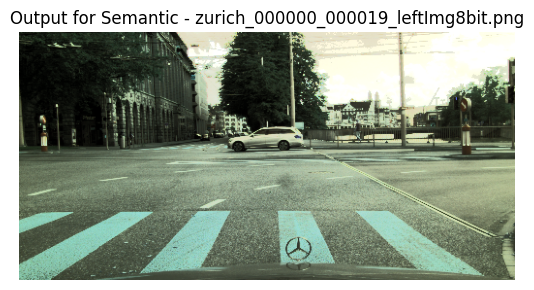

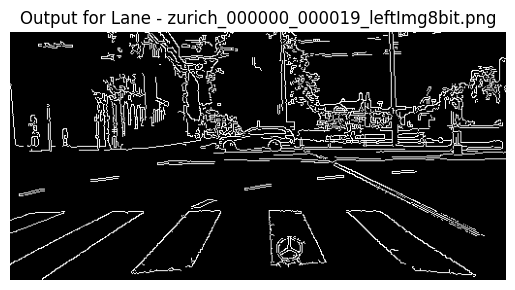

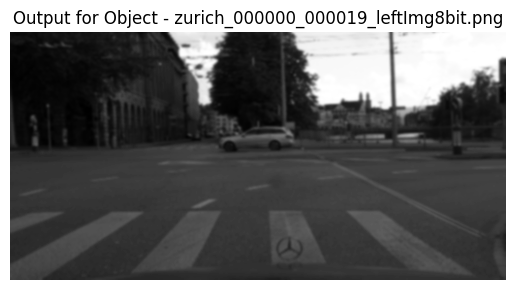

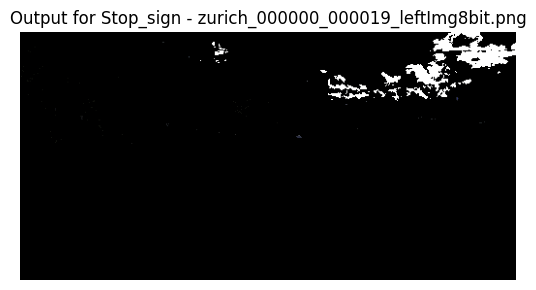

In [41]:
# Function to display images
def display_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the output for the first processed image
for module, img in first_processed_images.items():
    display_image(img, f'Output for {module.capitalize()} - {first_image_filename}')

# Function to visualize pixel distributions
def plot_pixel_distribution(original_image, preprocessed_image, title):
    plt.figure(figsize=(12, 6))
    
    # Plot original image pixel distribution
    plt.subplot(1, 2, 1)
    plt.hist(original_image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.6)
    plt.title(f'Original Pixel Distribution - {title}')
    
    # Plot preprocessed image pixel distribution
    plt.subplot(1, 2, 2)
    plt.hist(preprocessed_image.ravel(), bins=256, range=(0, 1), color='green', alpha=0.6)
    plt.title(f'Preprocessed Pixel Distribution - {title}')
    
    plt.show()

# Function to visualize pixel distributions for the first sample image
def visualize_pixel_distributions(input_dir):
    image_paths = [os.path.join(input_dir, fname) for fname in os.listdir(input_dir)]
    
    # Load a sample image (first one for demonstration)
    sample_image_path = image_paths[0]
    sample_image = cv2.imread(sample_image_path)

    # Preprocess for each module
    semantic_image = preprocess_semantic(sample_image)
    lane_image = preprocess_lane(sample_image)
    object_image = preprocess_object(sample_image)
    stop_sign_image = preprocess_stop_sign(sample_image)
    
    # Plot distributions for each module (showing only one sample image)

# Visualize pixel distributions for the first sample image
visualize_pixel_distributions(input_dir)